In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from PIL  import Image
from matplotlib import pyplot as plt

setting up  the training datasett and the test data sett

In [11]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    
])

train_dataset = torchvision.datasets.MNIST(root = './data' , train = True ,transform=transform , download = True)
test_dataset = torchvision.datasets.MNIST(root = './data' , train = False ,transform=transform , download = True)

train_loader = DataLoader(train_dataset,batch_size=64 , shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64 , shuffle=True)

setting up the class for the network 

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        layer_size = 32 
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=layer_size , kernel_size=2 , stride=1 , padding=1)
        self.conv2 = nn.Conv2d(in_channels= layer_size , out_channels= 64 , kernel_size=3 , stride=1 , padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2 , stride=2 , padding=0)
        self.fc1 = nn.Linear(64*7*7,128)
        self.fc2 = nn.Linear(128,10)
        self.dropout = nn.Dropout(0.33)
    def forward(self , x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x=x.view(-1,64*7*7)
        x = self.fc1(x)
        x=F.relu(x)

        x = self.dropout(x)
        x = self.fc2(x)

        return x 



In [13]:

model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)



Epoch [1/5], Loss: 0.2482
Epoch [2/5], Loss: 0.0829
Epoch [3/5], Loss: 0.0616
Epoch [4/5], Loss: 0.0491
Epoch [5/5], Loss: 0.0409


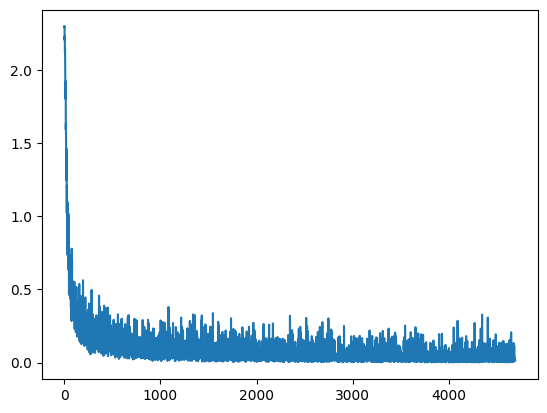

In [14]:
epoches = 5

y = []
for epoch in range(epoches):
    model.train()
    running_loss = 0.0
    for images,labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        y.append(loss.item())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{epoches}], Loss: {running_loss/len(train_loader):.4f}')
plt.plot(y)
    


Test set: Average loss: 0.0285, Accuracy: 9913/10000 (99%)


(0.0, 1.0)

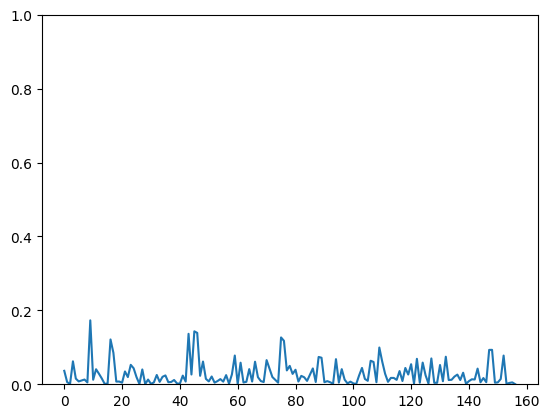

In [15]:
model.eval()
correct = 0 
total = 0 
test_loss = 0.0
y1 = []
with torch.no_grad():
    for images , labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        test_loss += criterion(output , labels).item()
        y1.append(criterion(output , labels).item())
        _, predict = torch.max(output.data,1)
        total += labels.size(0)
        correct  += (predict == labels).sum().item()
    test_loss /= len(test_loader)
    accuracy = 100 * correct / total
print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{total} ({accuracy:.0f}%)')
plt.plot(y1)
plt.ylim([0 , 1])



In [16]:
# Save the model
torch.save(model.state_dict(), 'mnist_cnn.pth')

In [17]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    
])


img = Image.open('4.jpg')

transformed_img = transform(img)
transformed_img = transformed_img.to(device)

output = model(transformed_img)

predicted_class = output.argmax().item()

print(f'predicted class is {predicted_class}')

predicted class is 4


In [18]:
def check_number(root):
    transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    
    ])
    img = Image.open(root)

    transformed_img = transform(img)
    transformed_img = transformed_img.to(device)

    output = model(transformed_img)

    predicted_class = output.argmax().item()

    print(f'predicted class is {predicted_class}')
for i in range(0,10):
    image_root = f'{i}.jpg'
    check_number(image_root)

predicted class is 0
predicted class is 1
predicted class is 2
predicted class is 3
predicted class is 4
predicted class is 5
predicted class is 9
predicted class is 7
predicted class is 2
predicted class is 9


In [16]:

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        layer_size = 32 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=layer_size, kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=layer_size, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.33)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        x = x.view(-1, 64*7*7)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.dropout(x)
        x = self.fc2(x)

        return x 

# Instantiate the model
model = CNN()

# Load the state dictionary from the file
state_dict = torch.load('mnist_cnn.pth')
model.load_state_dict(state_dict)
model.eval()

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the transform
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

# Load and transform the image
img = Image.open('4.jpg')
transformed_img = transform(img)
transformed_img = transformed_img.unsqueeze(0)  # Add batch dimension
transformed_img = transformed_img.to(device)

# Perform inference
with torch.no_grad():
    output = model(transformed_img)

# Get the predicted class
predicted_class = output.argmax().item()

print(f'Predicted class is {predicted_class}')


Predicted class is 4
